In [1]:
# @title Imports

import functools
import json

from flax import jax_utils
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
import ml_collections
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_datasets as tfds

from google3.pyglib import build_data
from google3.pyglib import gfile
# build_data.Changelist()

from colabtools import adhoc_import
# # this is necessary, otherwise breaks the adhoc_import.Google3CitcClient imports
with adhoc_import.Google3():
  from scenic.model_lib.base_models import base_model
  from scenic.projects.multimask.models import model_utils as mm_model_utils
  from scenic.model_lib.base_models import model_utils
  # from google3.medical.waveforms.modelling.lsm.datasets.lsm import experiment_constants


# this needs to run for some reason, otherwise adhoc_import.Google3CitcClient import breaks
tf.data.Dataset

google3.third_party.tensorflow.python.data.ops.dataset_ops.DatasetV2

In [9]:
from importlib import reload
from colabtools import adhoc_import

with adhoc_import.Google3CitcClient(
    'lsm_fuck_25_3_17', username='xumax', behavior='preferred'
):
  from google3.experimental.largesensormodels.scenic.trainers.masking import masker
  masker = reload(masker)

  from google3.experimental.largesensormodels.scenic.datasets import get_dataset
  get_dataset = reload(get_dataset)



  from google3.experimental.largesensormodels.scenic.configs.lsm_v2_pretraining import mae_lsm_v2_mt_small
  mae_lsm_v2_mt_small = reload(mae_lsm_v2_mt_small)
  config = mae_lsm_v2_mt_small.get_config(runlocal="True")

In [10]:
rng = jax.random.PRNGKey(config.rng_seed)
data_rng, rng = jax.random.split(rng)
dataset = get_dataset.get_dataset(config, data_rng)

train_dataset_name: lsm_v2_pretrain_sessions_-1_windowsize_1440_sensorfeatures_26_validonly_False_missingratio_0.5_timestamp_202503090320
valid_dataset_name: lsm_v2_missing_balanced_20250301_valid_dataset
train_data_dir: /namespace/fitbit-medical-sandboxes/jg/partner/encrypted/chr-ards-fitbit-prod-research/deid/exp/dmcduff/ttl=52w/lsm_v2/datasets/tfds/lsm_v2_pretrain_sessions_-1_windowsize_1440_sensorfeatures_26_validonly_False_missingratio_0.5_timestamp_202503090320
valid_data_dir: /namespace/fitbit-medical-sandboxes/jg/partner/encrypted/chr-ards-fitbit-prod-research/deid/exp/dmcduff/ttl=52w/lsm_v2/datasets/tfds_test/lsm_v2_missing_balanced_20250301_valid_dataset


In [11]:
batch = next(dataset.train_iter)

In [12]:
batch.keys()

dict_keys(['batch_mask', 'datetime_signal', 'exercise_log', 'imputation_mask', 'imputation_ratio', 'input_signal', 'label', 'log_value', 'mask_indices', 'mood_log', 'token_mask', 'unmasked_indices'])

In [13]:
batch["token_mask"]

array([[[0, 1, 1, ..., 0, 1, 1]]], shape=(1, 1, 3744), dtype=int32)

In [14]:
temp = batch["token_mask"][0,0,:].reshape([144,-1])

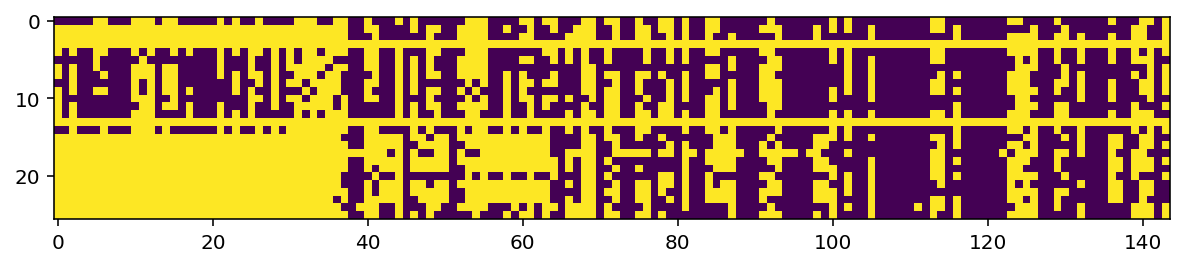

In [15]:
plt.figure(figsize=(10,5))
plt.imshow(temp.T)

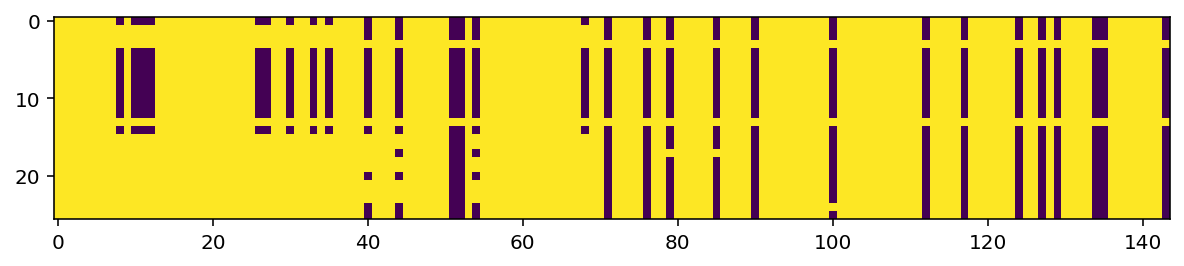

In [8]:
plt.figure(figsize=(10,5))
plt.imshow(temp.T)

In [9]:
np.sum(temp) / np.prod(temp.shape)

np.float64(0.8555021367521367)

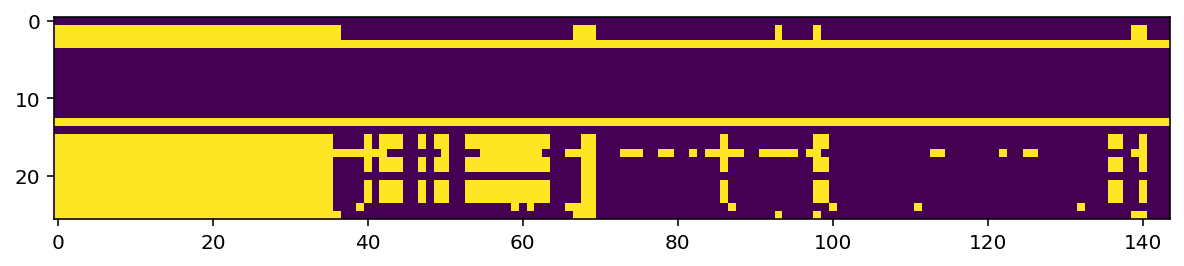

In [11]:
# @title Before
plt.figure(figsize=(10,5))
plt.imshow(temp.T)

In [ ]:
# @title Imports

import functools
from typing import Any, Callable, Dict, Iterator, Tuple, Optional, Type, Union

from absl import logging
from clu import metric_writers
from clu import periodic_actions
from clu import platform

import flax
from flax import jax_utils
import flax.linen as nn
import jax
import jax.numpy as jnp
import jax.profiler

import ml_collections
import numpy as np
import optax
import tensorflow as tf
import tensorflow_datasets as tfds

import matplotlib
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
%matplotlib inline

from colabtools import adhoc_import
with adhoc_import.Google3():
  from scenic.dataset_lib import dataset_utils
  from scenic.google.xm import xm_utils
  from scenic.model_lib.base_models import base_model
  from scenic.model_lib.base_models import model_utils
  from scenic.model_lib.layers import nn_ops
  from scenic.model_lib.layers import nn_layers
  from scenic.projects.baselines import vit
  from scenic.train_lib import optax as scenic_optax
  from scenic.train_lib import pretrain_utils
  from scenic.train_lib import train_utils

  from scenic.projects.multimask.models import model_utils as mm_model_utils

  from google3.experimental.largesensormodels.scenic.datasets import dataset_constants
  from google3.experimental.largesensormodels.scenic.datasets import lsm_tiny_dataset
  from google3.experimental.largesensormodels.scenic.models import lsm_vit as lsm_vit_mae
  from google3.experimental.largesensormodels.scenic.models.lsm_vit_utils import model_constants
  from google3.experimental.largesensormodels.scenic.models.lsm_vit_utils import model_utils as lsm_model_utils
  from google3.experimental.largesensormodels.scenic.trainers import lsm_mae_trainer

  from google3.pyglib import gfile


Batch = Dict[str, jnp.ndarray]
MetricFn = Callable[
    [jnp.ndarray, jnp.ndarray, Dict[str, jnp.ndarray]],
    Dict[str, Tuple[float, int]],
]
LossFn = Callable[
    [jnp.ndarray, Batch, Optional[jnp.ndarray], jnp.ndarray], float
]
LrFns = Dict[str, Callable[[jnp.ndarray], jnp.ndarray]]
Patch = Union[Tuple[int, int], Tuple[int, int, int]]

FileNotFoundError: [Errno 2] Resource not found: 'google3/third_party/geos/libgeos_c.so'